In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(
         'covipred-163e02a5c199.json', scope)
gc = gspread.authorize(credentials)

covid_d = gc.open("Copy of COVIDSL.COM Data").sheet1

covid_d = covid_d.get_all_records()

covid_d = pd.DataFrame(covid_d)
covid_d.head()

,,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Click Here For Sheet Information,Notes,Source(s),Related Patients,Known Cluster,Prefecture Patient Number,City Patient Number,Charter Flight Passenger
0,1,2020-01-27,2020-01-27,44,F,"China, Hubei",Katunayake,Gampaha,Discharged,,,,,,,,
1,2,2020-03-10,2020-03-10,52,M,Mattegoda,Mattegoda,Colombo,Discharged,,,http://www.hirunews.lk/236728/second-corona-in...,,,,,
2,3,2020-03-12,2020-03-12,44,M,Borella,Colombo 08,Colombo,Discharged,,From Germany,https://www.youtube.com/watch?v=UZeM8slJ6Os&fe...,,,,,
3,4,2020-03-13,2020-03-13,41,M,,Colombo 08,Colombo,Hospitalized,If anyone can provide patients',,https://www.youtube.com/watch?v=UZeM8slJ6Os&fe...,,,,,
4,5,2020-03-13,2020-03-13,37,M,,Mahara,Gampaha,Hospitalized,"non-sensible data (City, Age,",,https://www.youtube.com/watch?v=UZeM8slJ6Os&fe...,,,,,


In [3]:
#remove all unnecessary columns
covid_data = covid_d
del_column_array = ['Age Bracket', 'Gender', 'Date Added', 'Residence City, Prefecture', 'Click Here For Sheet Information', 
                    'Source(s)', 'Related Patients', 'Known Cluster', 'Prefecture Patient Number', 'City Patient Number',
                    'Charter Flight Passenger']

for col in del_column_array:
    del covid_data[col]

In [4]:
covid_data.head()

,,Date Announced,Detected City,Detected Prefecture,Status,Notes
0,1,2020-01-27,Katunayake,Gampaha,Discharged,
1,2,2020-03-10,Mattegoda,Colombo,Discharged,
2,3,2020-03-12,Colombo 08,Colombo,Discharged,From Germany
3,4,2020-03-13,Colombo 08,Colombo,Hospitalized,
4,5,2020-03-13,Mahara,Gampaha,Hospitalized,


In [5]:
covid_data.tail()

,,Date Announced,Detected City,Detected Prefecture,Status,Notes
58426,58425,2021-01-24,,Jaffna,Hospitalized,
58427,58426,2021-01-24,,Jaffna,Hospitalized,
58428,58427,2021-01-24,,Batticaloa,Hospitalized,
58429,58428,2021-01-24,,Overseas Arrivals (Quarantine Centers),Hospitalized,
58430,58429,2021-01-24,,Overseas Arrivals (Quarantine Centers),Hospitalized,


In [6]:
covid_data.drop(covid_data[covid_data['Detected Prefecture'] == 'Quarantine Centers'].index, inplace=True)

In [7]:
covid_data.tail()

,,Date Announced,Detected City,Detected Prefecture,Status,Notes
58426,58425,2021-01-24,,Jaffna,Hospitalized,
58427,58426,2021-01-24,,Jaffna,Hospitalized,
58428,58427,2021-01-24,,Batticaloa,Hospitalized,
58429,58428,2021-01-24,,Overseas Arrivals (Quarantine Centers),Hospitalized,
58430,58429,2021-01-24,,Overseas Arrivals (Quarantine Centers),Hospitalized,


In [8]:
covid_data['Detected Prefecture'].value_counts()

Colombo                                   22171
Gampaha                                   11188
Unspecified                                6881
Kalutara                                   3921
Kandy                                      2670
Ratnapura                                  1251
Galle                                      1235
Kurunegala                                 1102
Ampara                                      901
Kegalle                                     744
Matara                                      666
Naval Base - Welisara                       589
Nuwara Eliya                                487
Puttalam                                    476
Matale                                      423
Kandakadu Rehabilitation Center             396
Overseas Arrivals (Quarantine Centers)      394
Batticaloa                                  372
Polonnaruwa                                 314
Vavuniya                                    286
Hambantota                              

In [9]:
#saving new csv file
covid_data.to_csv('../progress csvs/unnecessary-columns-removed.csv')

In [10]:
data = pd.read_csv("../progress csvs/unnecessary-columns-removed.csv")
data.head()

,Unnamed: 0,,Date Announced,Detected City,Detected Prefecture,Status,Notes
0,0,1.0,2020-01-27,Katunayake,Gampaha,Discharged,NaN
1,1,2.0,2020-03-10,Mattegoda,Colombo,Discharged,NaN
2,2,3.0,2020-03-12,Colombo 08,Colombo,Discharged,From Germany
3,3,4.0,2020-03-13,Colombo 08,Colombo,Hospitalized,NaN
4,4,5.0,2020-03-13,Mahara,Gampaha,Hospitalized,NaN


In [11]:
data.columns

Index(['Unnamed: 0', ' ', 'Date Announced', 'Detected City',
       'Detected Prefecture', 'Status', 'Notes'],
      dtype='object')

In [12]:
del data['Unnamed: 0']

In [13]:
data.columns

Index([' ', 'Date Announced', 'Detected City', 'Detected Prefecture', 'Status',
       'Notes'],
      dtype='object')

In [14]:
nullData = data.isnull()
nullData.head()

,,Date Announced,Detected City,Detected Prefecture,Status,Notes
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True


<AxesSubplot:>

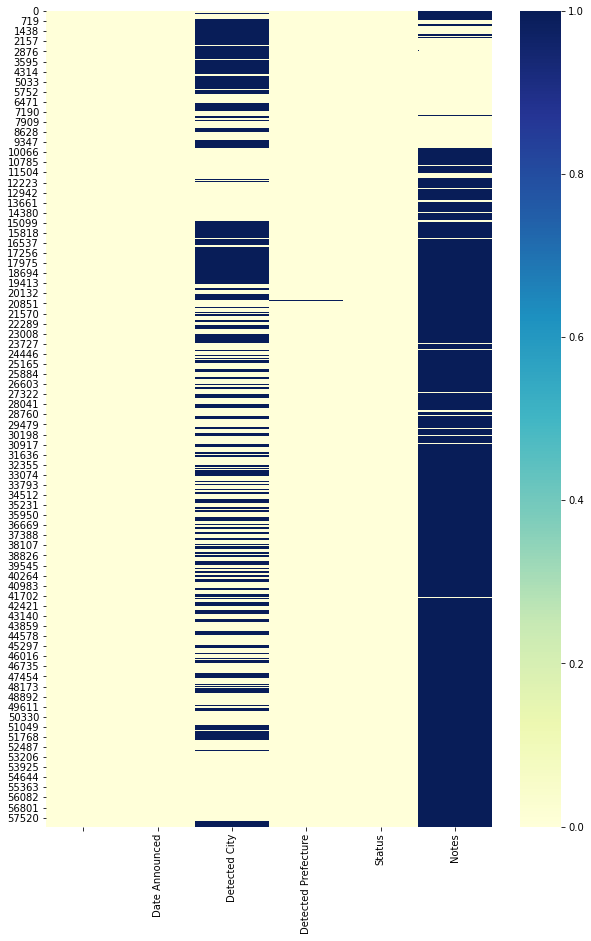

In [15]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(ax=ax, data=nullData, cmap="YlGnBu")

In [16]:
# the idea here was to replace the empty "detected prefecture" values with values of "detected city"
# if there were values for "detected city"
unspecifiedCount = 0

for i in range(len(data)):
    tempPrefecture = covid_data.iloc[i]['Detected Prefecture']
    tempCity = covid_data.iloc[i]['Detected City']
    
    if(tempPrefecture == 'Unspecified' and str(tempCity) != 'nan'):
        unspecifiedCount += 1
print(unspecifiedCount)

6881


In [17]:
#detected cities were then dropped
del data['Detected City']

In [18]:
nullData = data.isnull()
nullData.head()

,,Date Announced,Detected Prefecture,Status,Notes
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,True


<AxesSubplot:>

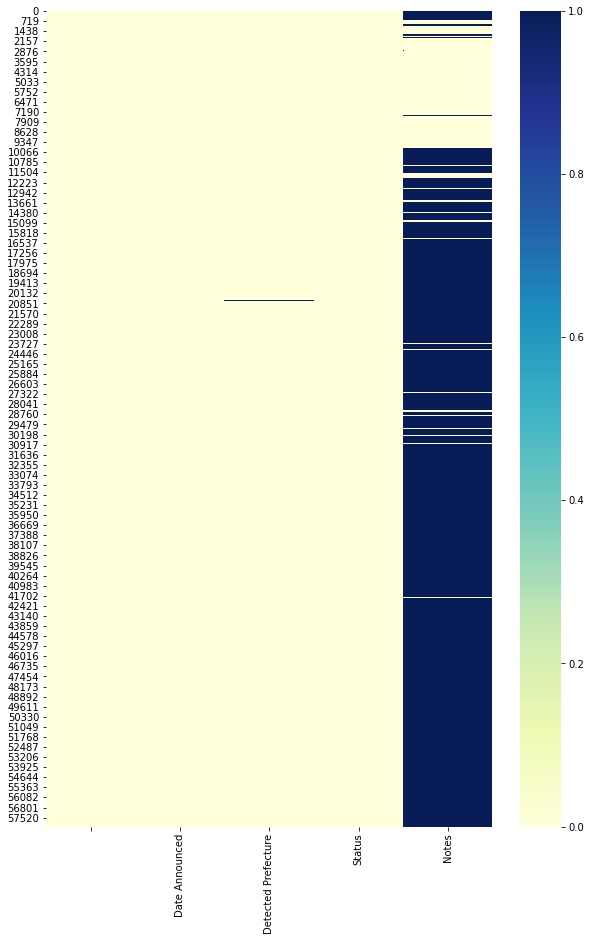

In [19]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(ax=ax, data=nullData, cmap="YlGnBu")

In [20]:
# displaying the content of the Note columns
bool_series = pd.notnull(data["Notes"])
data[['Notes']][bool_series]

,Notes
2,From Germany
11,Local from Germany
13,Indian national
19,Father of the person who came from Italy
29,"Reportedly, he had previously undergone a kidn..."
...,...
55801,From Kuwait
55802,From Kuwait
55803,From USA
55804,From UAE


In [21]:
# checking for the number of unspecified and Naval Base from detected prefecture
data['Detected Prefecture'].value_counts()

Colombo                                   22171
Gampaha                                   11188
Unspecified                                6881
Kalutara                                   3921
Kandy                                      2670
Ratnapura                                  1251
Galle                                      1235
Kurunegala                                 1102
Ampara                                      901
Kegalle                                     744
Matara                                      666
Naval Base - Welisara                       589
Nuwara Eliya                                487
Puttalam                                    476
Matale                                      423
Kandakadu Rehabilitation Center             396
Overseas Arrivals (Quarantine Centers)      394
Batticaloa                                  372
Polonnaruwa                                 314
Vavuniya                                    286
Hambantota                              

In [22]:
# Find the number of Detected Prefecture = Unspecified and Note which is equal to "Peliyagoda" cluster
nullData['Detected Prefecture'] = data["Detected Prefecture"] == "Unspecified"
nullData['Notes'] = data["Notes"] == "Peliyagoda cluster"

<AxesSubplot:>

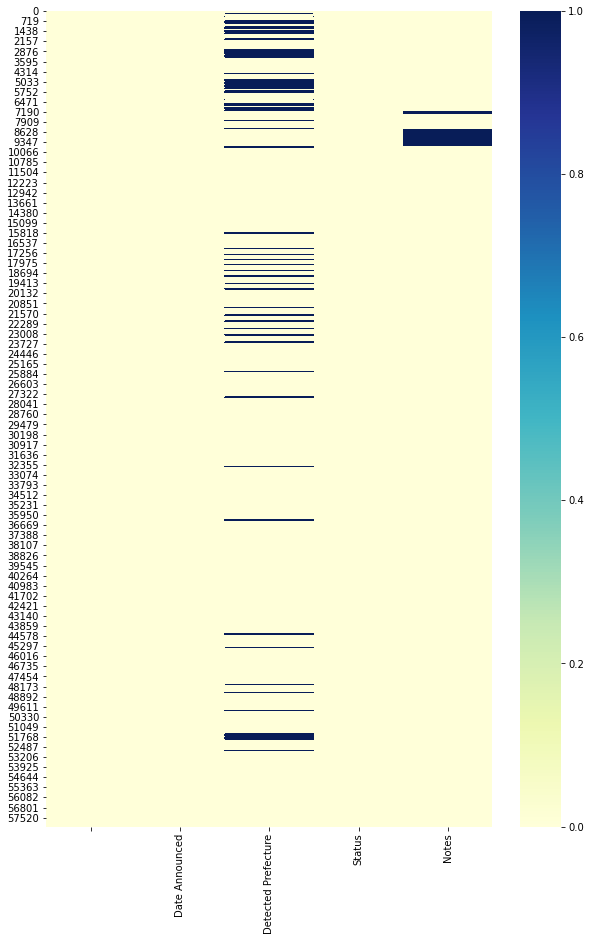

In [23]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(ax=ax, data=nullData, cmap="YlGnBu")

In [24]:
data.shape[0]

58160

In [25]:
data.loc[(data['Detected Prefecture']=="Unspecified") & (data['Notes']== "Peliyagoda cluster"), 'Detected Prefecture'] = 'Peliyagoda cluster' 

<AxesSubplot:>

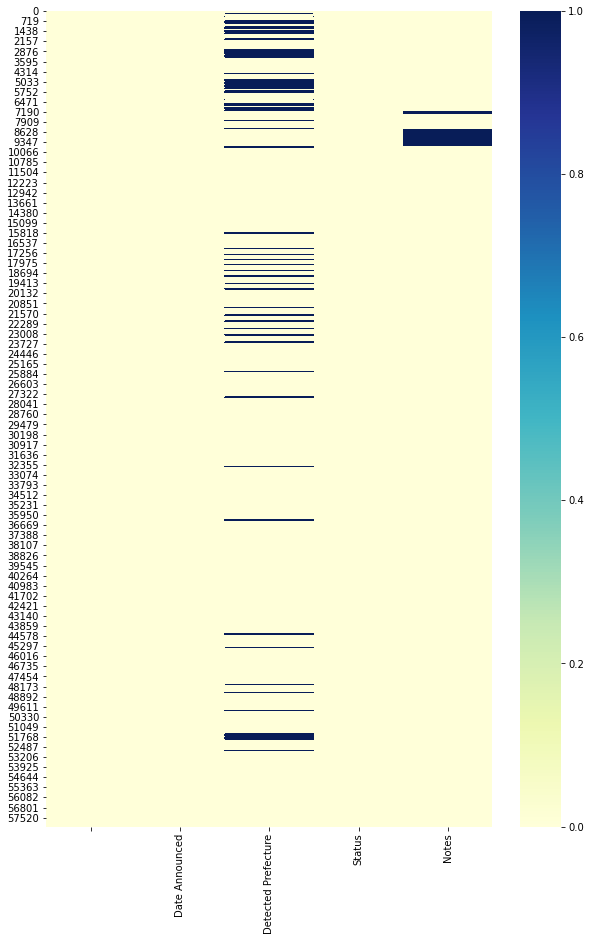

In [26]:
# Find the number of Detected Prefecture = Unspecified and Note which is equal to "Peliyagoda" cluster

nullData['Detected Prefecture'] = data["Detected Prefecture"] == "Unspecified"
nullData['Notes'] = data["Notes"] == "Peliyagoda cluster"

fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(ax=ax, data=nullData, cmap="YlGnBu")

In [27]:
data = data.drop(['Notes'], axis=1)

In [28]:
data.head()

,,Date Announced,Detected Prefecture,Status
0,1.0,2020-01-27,Gampaha,Discharged
1,2.0,2020-03-10,Colombo,Discharged
2,3.0,2020-03-12,Colombo,Discharged
3,4.0,2020-03-13,Colombo,Hospitalized
4,5.0,2020-03-13,Gampaha,Hospitalized


In [29]:
cleanData = data[data['Detected Prefecture'] != 'Unspecified'] 
cleanData

,,Date Announced,Detected Prefecture,Status
0,1.0,2020-01-27,Gampaha,Discharged
1,2.0,2020-03-10,Colombo,Discharged
2,3.0,2020-03-12,Colombo,Discharged
3,4.0,2020-03-13,Colombo,Hospitalized
4,5.0,2020-03-13,Gampaha,Hospitalized
...,...,...,...,...
58155,58425.0,2021-01-24,Jaffna,Hospitalized
58156,58426.0,2021-01-24,Jaffna,Hospitalized
58157,58427.0,2021-01-24,Batticaloa,Hospitalized
58158,58428.0,2021-01-24,Overseas Arrivals (Quarantine Centers),Hospitalized


In [30]:
# checking for the number of unspecified and Naval Base from detected prefecture
cleanData['Detected Prefecture'].value_counts()

Colombo                                   22171
Gampaha                                   11188
Kalutara                                   3921
Kandy                                      2670
Ratnapura                                  1251
Galle                                      1235
Kurunegala                                 1102
Ampara                                      901
Kegalle                                     744
Matara                                      666
Naval Base - Welisara                       589
Nuwara Eliya                                487
Puttalam                                    476
Matale                                      423
Kandakadu Rehabilitation Center             396
Overseas Arrivals (Quarantine Centers)      394
Batticaloa                                  372
Polonnaruwa                                 314
Vavuniya                                    286
Hambantota                                  269
Jaffna                                  

In [31]:
cleanData = cleanData[cleanData['Detected Prefecture'] != 'Overseas Arrivals (Quarantine Centers)'] 

In [32]:
cleanData.loc[(cleanData['Detected Prefecture'] == 'Kandakadu Rehabilitation Center'), 'Detected Prefecture'] = "Polonnaruwa"
cleanData.loc[(cleanData['Detected Prefecture'] == 'Senapura Rehabilitation Center') , 'Detected Prefecture'] = "Polonnaruwa"
cleanData['Detected Prefecture'].value_counts()

c:\users\ammuuu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Colombo                   22171
Gampaha                   11188
Kalutara                   3921
Kandy                      2670
Ratnapura                  1251
Galle                      1235
Kurunegala                 1102
Ampara                      901
Polonnaruwa                 855
Kegalle                     744
Matara                      666
Naval Base - Welisara       589
Nuwara Eliya                487
Puttalam                    476
Matale                      423
Batticaloa                  372
Vavuniya                    286
Hambantota                  269
Jaffna                      262
Trincomalee                 254
Anuradhapura                167
Mannar                      144
Moneragala                  144
Badulla                     109
Mullaitivu                  101
Kilinochchi                  35
Kendalanda                    1
Godagama                      1
Name: Detected Prefecture, dtype: int64

In [33]:
# renaming some districts
cleanData.loc[(cleanData['Detected Prefecture'] == 'Naval Base - Welisara '), 'Detected Prefecture'] = "Welisara"
cleanData.loc[(cleanData['Detected Prefecture'] == 'Peliyagoda cluster'), 'Detected Prefecture'] = "Peliyagoda"
cleanData['Detected Prefecture'].value_counts()

Colombo         22171
Gampaha         11188
Kalutara         3921
Kandy            2670
Ratnapura        1251
Galle            1235
Kurunegala       1102
Ampara            901
Polonnaruwa       855
Kegalle           744
Matara            666
Welisara          589
Nuwara Eliya      487
Puttalam          476
Matale            423
Batticaloa        372
Vavuniya          286
Hambantota        269
Jaffna            262
Trincomalee       254
Anuradhapura      167
Mannar            144
Moneragala        144
Badulla           109
Mullaitivu        101
Kilinochchi        35
Godagama            1
Kendalanda          1
Name: Detected Prefecture, dtype: int64

In [34]:
cleanData.to_csv('../progress csvs/districts-created.csv')

In [35]:
cleanData.head()

,,Date Announced,Detected Prefecture,Status
0,1.0,2020-01-27,Gampaha,Discharged
1,2.0,2020-03-10,Colombo,Discharged
2,3.0,2020-03-12,Colombo,Discharged
3,4.0,2020-03-13,Colombo,Hospitalized
4,5.0,2020-03-13,Gampaha,Hospitalized


In [36]:
#  25 Districts in 9 Provinces of Sri Lanka.
# Northern :- (Jaffna, Kilinochch, Mannar, Mullaitivu, Vavuniya)
# NorthWestern :- (Puttalam, Kurunegala)
# Western :- (Gampaha, Colombo, Kalutara)
# NorthCentral :- (Anuradhapura, Polonnaruwa)
# Central :- (Matale, Kandy, Nuwara Eliya)
# Sabaragamuwa :- (Kegalle, Ratnapura)
# Uva :- (Badulla, Monaragala)
# Southern :- (Hambantota, Matara, Galle)
# Eastern :- (Trincomalee, Batticaloa, Ampara)

In [87]:
covid_data = pd.read_csv("../progress csvs/districts-created.csv")

In [106]:
covid_data = covid_data[covid_data['Detected Prefecture'].notnull()] 

In [108]:
provinceDictionary = {'Western':['Colombo','Gampaha','Kalutara','Peliyagoda','Godagama','Welisara','Kendalanda'],
                     'Central':['Kandy','Matale','Nuwara Eliya'],
                     'Nothern':['Jaffna','Kilinochchi','Mannar','Mullaitivu','Vavuniya'],
                     'Southern':['Galle','Hambantota','Matara'],
                     'Uva':['Badulla','Moneragala'],
                     'Sabaragamuwa':['Ratnapura','Kegalle'],
                     'North Western':['Kurunegala','Puttalam'],
                     'Northern Central':['Polonnaruwa','Anuradhapura'],
                     'Eastern':['Batticaloa','Trincomalee','Ampara']}

addProvinceColumn = []

for i in range(len(covid_data)):
    tempPrefecture = covid_data.iloc[i]['Detected Prefecture']
    for province, districts in provinceDictionary.items():
        if tempPrefecture in districts:
            addProvinceColumn.append(province)
            break

covid_data['Province'] = addProvinceColumn
covid_data.to_csv('../progress csvs/provinces-created.csv')

c:\users\ammuuu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [109]:
final_provinces = pd.read_csv('../progress csvs/provinces-created.csv')
final_provinces.head()

,Unnamed: 0,Unnamed: 0.1,,Date Announced,Detected Prefecture,Status,Province
0,0,0,1.0,2020-01-27,Gampaha,Discharged,Western
1,1,1,2.0,2020-03-10,Colombo,Discharged,Western
2,2,2,3.0,2020-03-12,Colombo,Discharged,Western
3,3,3,4.0,2020-03-13,Colombo,Hospitalized,Western
4,4,4,5.0,2020-03-13,Gampaha,Hospitalized,Western


In [110]:
del final_provinces['Unnamed: 0']
final_provinces.head()

,Unnamed: 0.1,,Date Announced,Detected Prefecture,Status,Province
0,0,1.0,2020-01-27,Gampaha,Discharged,Western
1,1,2.0,2020-03-10,Colombo,Discharged,Western
2,2,3.0,2020-03-12,Colombo,Discharged,Western
3,3,4.0,2020-03-13,Colombo,Hospitalized,Western
4,4,5.0,2020-03-13,Gampaha,Hospitalized,Western


In [111]:
final_provinces.to_csv('../progress csvs/final-provinces-created.csv')

In [112]:
data = pd.read_csv('../progress csvs/final-provinces-created.csv');
data.head(5)

,Unnamed: 0,Unnamed: 0.1,,Date Announced,Detected Prefecture,Status,Province
0,0,0,1.0,2020-01-27,Gampaha,Discharged,Western
1,1,1,2.0,2020-03-10,Colombo,Discharged,Western
2,2,2,3.0,2020-03-12,Colombo,Discharged,Western
3,3,3,4.0,2020-03-13,Colombo,Hospitalized,Western
4,4,4,5.0,2020-03-13,Gampaha,Hospitalized,Western


In [113]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', ' ', 'Date Announced',
       'Detected Prefecture', 'Status', 'Province'],
      dtype='object')

In [114]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1',], axis=1)

In [115]:
newData = data.drop(['Detected Prefecture', 'Status'], axis=1)
newData['TotalCases'] = 0

currentDate = ''
currentProvince = ''
counter = 0

for i in range (newData.shape[0]):
    if((newData['Date Announced'][i] == currentDate) and (newData['Province'][i] == currentProvince)):
        counter += 1
        newData = newData.drop([i-1])
    else:
        counter = 1
        
    newData['TotalCases'][i] = counter
    currentDate = newData['Date Announced'][i]
    currentProvince = newData['Province'][i]

c:\users\ammuuu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [116]:
newData.reset_index(drop=True, inplace=True)
newData.tail(10)

,,Date Announced,Province,TotalCases
1417,58366.0,2021-01-24,Northern Central,2
1418,58368.0,2021-01-24,Nothern,2
1419,58372.0,2021-01-24,Uva,4
1420,58380.0,2021-01-24,Northern Central,8
1421,58385.0,2021-01-24,Central,5
1422,58398.0,2021-01-24,Eastern,13
1423,58412.0,2021-01-24,North Western,14
1424,58421.0,2021-01-24,Uva,9
1425,58426.0,2021-01-24,Nothern,5
1426,58427.0,2021-01-24,Eastern,1


In [117]:
newCurrentDate = ''
provinceList = []
TotalCasesList = []
indexPosition = []

for i in range(newData.shape[0]):
    if newData['Date Announced'][i] == newCurrentDate:
        if newData['Province'][i] in provinceList:
            
            provinceIndex = provinceList.index(newData['Province'][i])
            
            replacingCasesIndexRow = indexPosition[provinceIndex]
            
            newData['TotalCases'][replacingCasesIndexRow] = newData['TotalCases'][replacingCasesIndexRow] + newData['TotalCases'][i]
            
            newData = newData.drop([i])
        else:
            
            provinceList.append(newData['Province'][i])
            
            TotalCasesList.append(newData['TotalCases'][i])
            
            indexPosition.append(i)
    else:
        provinceList = []
        TotalCasesList = []
        indexPosition = []
        newCurrentDate = newData['Date Announced'][i]

c:\users\ammuuu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
newData.head(10)

,,Date Announced,Province,TotalCases
0,1.0,2020-01-27,Western,1
1,2.0,2020-03-10,Western,1
2,3.0,2020-03-12,Western,1
3,5.0,2020-03-13,Western,2
4,6.0,2020-03-13,North Western,1
5,7.0,2020-03-14,North Western,1
6,10.0,2020-03-14,Western,3
7,11.0,2020-03-14,Southern,1
8,15.0,2020-03-15,Western,4
9,18.0,2020-03-15,Northern Central,3


In [119]:
newData.to_csv('../progress csvs/totals-column-created.csv')

In [120]:
total_data = pd.read_csv("../progress csvs/totals-column-created.csv")
total_data.head()

,Unnamed: 0,,Date Announced,Province,TotalCases
0,0,1.0,2020-01-27,Western,1
1,1,2.0,2020-03-10,Western,1
2,2,3.0,2020-03-12,Western,1
3,3,5.0,2020-03-13,Western,2
4,4,6.0,2020-03-13,North Western,1


In [121]:
del total_data['Unnamed: 0']
total_data.head()

,,Date Announced,Province,TotalCases
0,1.0,2020-01-27,Western,1
1,2.0,2020-03-10,Western,1
2,3.0,2020-03-12,Western,1
3,5.0,2020-03-13,Western,2
4,6.0,2020-03-13,North Western,1


In [122]:
total_data = total_data.sort_values(by='Province')

In [123]:
df = [x for _, x in total_data.groupby('Province')]

In [124]:
central_province = df[0]
eastern_province = df[1]
northwestern_province = df[2]
northcentral_province= df[3]
nothern_province = df[4]
sabaragamuwa_province = df[5]
south_province = df[6]
uva_province = df[7]
western_province = df[8]

In [131]:
# provinces = [central_province, eastern_province, northwestern_province, northcentral_province, nothern_province, sabaragamuwa_province,
#              south_province, uva_province, western_province]

# for province in provinces:
#     del province['Province']

# for province in provinces:
#     province.to_csv(f"{province}.csv")

In [130]:
# del central_province['Province']
# del eastern_province['Province']
# del northwestern_province['Province']
# del northcentral_province['Province']
# del nothern_province['Province']
# del sabaragamuwa_province['Province']
# del south_province['Province']
# del uva_province['Province']
# del western_province['Province']

central_province.to_csv("../final province csvs/central_province.csv")
eastern_province.to_csv("../final province csvs/eastern_province.csv")
northwestern_province.to_csv("../final province csvs/northwestern_province.csv")
northcentral_province.to_csv("../final province csvs/northcentral_province.csv")
nothern_province.to_csv("../final province csvs/nothern_province.csv")
sabaragamuwa_province.to_csv("../final province csvs/sabaragamuwa_province.csv")
south_province.to_csv("../final province csvs/southern_province.csv")
uva_province.to_csv("../final province csvs/uva_province.csv")
western_province.to_csv("../final province csvs/western_province.csv")

In [5]:
all_districts = pd.read_csv("../progress csvs/districts-created.csv")

In [6]:
all_districts.head()

,Unnamed: 0,,Date Announced,Detected Prefecture,Status
0,0,1.0,2020-01-27,Gampaha,Discharged
1,1,2.0,2020-03-10,Colombo,Discharged
2,2,3.0,2020-03-12,Colombo,Discharged
3,3,4.0,2020-03-13,Colombo,Hospitalized
4,4,5.0,2020-03-13,Gampaha,Hospitalized


In [7]:
del all_districts['Unnamed: 0']

In [8]:
all_districts.head()

,,Date Announced,Detected Prefecture,Status
0,1.0,2020-01-27,Gampaha,Discharged
1,2.0,2020-03-10,Colombo,Discharged
2,3.0,2020-03-12,Colombo,Discharged
3,4.0,2020-03-13,Colombo,Hospitalized
4,5.0,2020-03-13,Gampaha,Hospitalized


In [9]:
all_districts['TotalCases'] = 0

In [10]:
all_districts.head()

,,Date Announced,Detected Prefecture,Status,TotalCases
0,1.0,2020-01-27,Gampaha,Discharged,0
1,2.0,2020-03-10,Colombo,Discharged,0
2,3.0,2020-03-12,Colombo,Discharged,0
3,4.0,2020-03-13,Colombo,Hospitalized,0
4,5.0,2020-03-13,Gampaha,Hospitalized,0


In [11]:
currentDate = ''
currentDistrict = ''
counter = 0

for i in range (all_districts.shape[0]):
    if((all_districts['Date Announced'][i] == currentDate) and (all_districts['Detected Prefecture'][i] == currentDistrict)):
        counter += 1
        newData = newData.drop([i-1])
    else:
        counter = 1
        
    all_districts['TotalCases'][i] = counter
    currentDate = all_districts['Date Announced'][i]
    currentProvince = all_districts['Detected Prefecture'][i]

c:\users\ammuuu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [12]:
all_districts.head()

,,Date Announced,Detected Prefecture,Status,TotalCases
0,1.0,2020-01-27,Gampaha,Discharged,1
1,2.0,2020-03-10,Colombo,Discharged,1
2,3.0,2020-03-12,Colombo,Discharged,1
3,4.0,2020-03-13,Colombo,Hospitalized,1
4,5.0,2020-03-13,Gampaha,Hospitalized,1


In [13]:
all_districts.reset_index(drop=True, inplace=True)
all_districts.tail(10)

,,Date Announced,Detected Prefecture,Status,TotalCases
50875,58418.0,2021-01-24,Badulla,Hospitalized,1
50876,58419.0,2021-01-24,Badulla,Hospitalized,1
50877,58420.0,2021-01-24,Badulla,Hospitalized,1
50878,58421.0,2021-01-24,Badulla,Hospitalized,1
50879,58422.0,2021-01-24,Kilinochchi,Hospitalized,1
50880,58423.0,2021-01-24,Kilinochchi,Hospitalized,1
50881,58424.0,2021-01-24,Mullaitivu,Hospitalized,1
50882,58425.0,2021-01-24,Jaffna,Hospitalized,1
50883,58426.0,2021-01-24,Jaffna,Hospitalized,1
50884,58427.0,2021-01-24,Batticaloa,Hospitalized,1


In [14]:
newCurrentDate = ''
districtList = []
TotalCasesList = []
indexPosition = []

for i in range(all_districts.shape[0]):
    if all_districts['Date Announced'][i] == newCurrentDate:
        if all_districts['Detected Prefecture'][i] in provinceList:
            
            provinceIndex = provinceList.index(all_districts['Detected Prefecture'][i])
            
            replacingCasesIndexRow = indexPosition[provinceIndex]
            
            all_districts['TotalCases'][replacingCasesIndexRow] = all_districts['TotalCases'][replacingCasesIndexRow] + all_districts['TotalCases'][i]
            
            all_districts = all_districts.drop([i])
        else:
            
            provinceList.append(all_districts['Detected Prefecture'][i])
            
            TotalCasesList.append(all_districts['TotalCases'][i])
            
            indexPosition.append(i)
    else:
        provinceList = []
        TotalCasesList = []
        indexPosition = []
        newCurrentDate = all_districts['Date Announced'][i]

c:\users\ammuuu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
all_districts.head(10)

,,Date Announced,Detected Prefecture,Status,TotalCases
0,1.0,2020-01-27,Gampaha,Discharged,1
1,2.0,2020-03-10,Colombo,Discharged,1
2,3.0,2020-03-12,Colombo,Discharged,1
3,4.0,2020-03-13,Colombo,Hospitalized,1
4,5.0,2020-03-13,Gampaha,Hospitalized,1
5,6.0,2020-03-13,Kurunegala,Hospitalized,1
6,7.0,2020-03-14,Puttalam,Hospitalized,1
7,8.0,2020-03-14,Colombo,Hospitalized,3
10,11.0,2020-03-14,Galle,Hospitalized,1
11,12.0,2020-03-15,Colombo,Hospitalized,1


In [17]:
all_districts.to_csv('../progress csvs/totals-column-created-districts.csv')

In [56]:
all_districts = pd.read_csv("../progress csvs/totals-column-created-districts.csv")
all_districts.head()

,Unnamed: 0,,Date Announced,Detected Prefecture,Status,TotalCases
0,0,1.0,2020-01-27,Gampaha,Discharged,1
1,1,2.0,2020-03-10,Colombo,Discharged,1
2,2,3.0,2020-03-12,Colombo,Discharged,1
3,3,4.0,2020-03-13,Colombo,Hospitalized,1
4,4,5.0,2020-03-13,Gampaha,Hospitalized,1


In [57]:
del all_districts['Unnamed: 0']

In [58]:
all_districts = all_districts.sort_values(by='Detected Prefecture')

In [59]:
all_districts_df = [x for _, x in all_districts.groupby('Detected Prefecture')]

In [60]:
all_districts_df

[              Date Announced Detected Prefecture        Status  TotalCases
 1127  37165.0     2020-12-20              Ampara  Hospitalized           8
 1392  44576.0     2021-01-03              Ampara  Hospitalized          17
 888   27170.0     2020-12-05              Ampara  Hospitalized          21
 1418  45209.0     2021-01-04              Ampara  Hospitalized           7
 870   26516.0     2020-12-04              Ampara  Hospitalized          17
 ...       ...            ...                 ...           ...         ...
 629   15171.0     2020-11-11              Ampara  Hospitalized           1
 1768  56590.0     2021-01-22              Ampara  Hospitalized          18
 556   12930.0     2020-11-06              Ampara  Hospitalized           1
 1820  58318.0     2021-01-24              Ampara  Hospitalized          16
 1720  54941.0     2021-01-20              Ampara  Hospitalized           5
 
 [66 rows x 5 columns],
               Date Announced Detected Prefecture        Statu

In [68]:
districts = ['Colombo','Gampaha','Kalutara','Godagama','Welisara','Kendalanda', 'Kandy','Matale','Nuwara Eliya',
'Jaffna','Kilinochchi','Mannar','Mullaitivu','Vavuniya', 'Galle','Hambantota','Matara', 'Badulla','Moneragala', 'Ratnapura','Kegalle',
'Kurunegala','Puttalam', 'Polonnaruwa','Anuradhapura', 'Batticaloa','Trincomalee','Ampara']

In [69]:
districts.sort()

In [70]:
len(districts)

28

In [72]:
for i in range(len(districts)):
    all_districts_df[i].to_csv(f'../final district csvs/{districts[i]}.csv')